In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

### BOX Plot - Finding Outliers

In [ ]:
housing_data=pd.read_csv('../../Data_Files/housing_data.csv')
housing_data.shape

In [ ]:
housing_data['House_type']=np.where(housing_data['YearBuilt'] > 2000 , 'New','Old')
housing_data['House_type'].value_counts()

In [ ]:
sns.countplot(x='House_type',data=housing_data, palette='bright')

1. To find outlier we need to identify the percentage of data where almost data cover

In [ ]:
sns.boxplot(x=housing_data['LotArea'])

In [ ]:
housing_data['LotArea'].describe()

In [8]:
## find out the distribution of box plot data
housing_data['LotArea'].quantile(0.99)
# 99% - 37567.64000000021 - we can see 99% data cover till 38K which is less than even 1 Lakh so we can use this as max area of distribution

np.float64(37567.64000000021)

### redifine dataframe by removing all data above 99% and take remaining as datarame

In [9]:
sub_housing_data=housing_data.loc[housing_data['LotArea'] < housing_data['LotArea'].quantile(0.99)]
sub_housing_data.shape

(1445, 82)

In [10]:
# we can see after removing outlier we left with 1445 entries out of 1460

In [ ]:
# box plot after removing outliers
sns.boxplot(x=sub_housing_data['LotArea'])

### Regression chart - to show relation between two parameters
1. can see the relation is positive and fent area represent the area of distribution
2. Dark blue line represent the relation upword

In [ ]:
sns.regplot(x='LotArea',y='SalePrice',data=housing_data)

In [ ]:
sns.regplot(x='LotArea',y='SalePrice',data=sub_housing_data)

### Heatmap chart - to represent magnitude of relation between different variable
1. Work on Numerical variable

In [ ]:
num_data=housing_data.select_dtypes(['int64','float64'])
num_data.columns

### create subset of numerical data

In [18]:
housing_df_reduce=housing_data[['LotArea','1stFlrSF','TotalBsmtSF','SalePrice']]
housing_df_reduce

,LotArea,1stFlrSF,TotalBsmtSF,SalePrice
0,8450,856,856,208500
1,9600,1262,1262,181500
2,11250,920,920,223500
3,9550,961,756,140000
4,14260,1145,1145,250000
...,...,...,...,...
1455,7917,953,953,175000
1456,13175,2073,1542,210000
1457,9042,1188,1152,266500
1458,9717,1078,1078,142125


### heatmap() will show this relation is color code to understand better with color representation
1. appllicable for Numerical variables
2.  Use case : 1. while developing the model, most highly relatable data will be usefull as compare to the ligh weight data
3. Which data is most contributting to data
4. Darker shade - Lighter shaded - low relatable
5. Lighter Shade - Highly relatable

<Axes: >

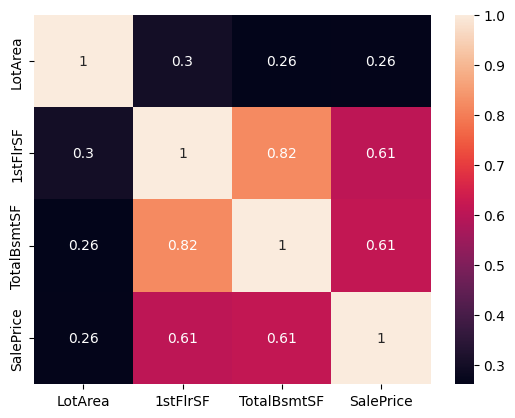

In [19]:
sns.heatmap(housing_df_reduce.corr(), annot=True)

### Feature Engineering - converting numerical data to categoriical data

In [20]:
housing_data['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [22]:
# We can use pandas cut() with bins and labels to create new categories based on existing numerical values
# bins = will create continuous range with provided range of data
# labes - will assign labels based on provided bins

# first create a new column to show the new categorical columns
price_bins=[0,45000,200000, 400000, 755000]
price_lables= ['Class1','Class2','Class3','Class4']
housing_data['Price Range']= pd.cut(housing_data['SalePrice'], bins=price_bins, labels=price_lables)

In [23]:
housing_data['Price Range'].value_counts()

Price Range
Class2    1028
Class3     399
Class4      28
Class1       5
Name: count, dtype: int64

In [ ]:
sns.countplot(x='Price Range', data=housing_data, palette='bright')

### Pie Chart - representing data in percentage format

([<matplotlib.patches.Wedge at 0x2472fe61c40>,
 [Text(-0.6579991205657679, 0.8814971113592353, 'Class2'),
  Text(0.5937998674489147, -0.9259598897455826, 'Class3'),
  Text(1.096324843379146, -0.0898434070463218, 'Class4'),
  Text(1.0999363495824157, -0.011833294862789499, 'Class1')])

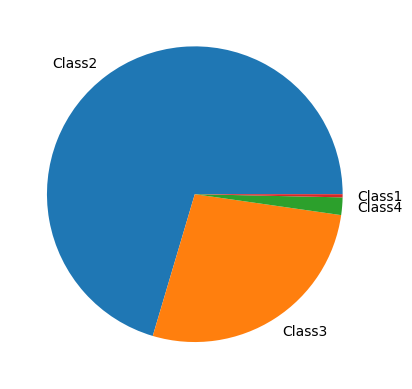

In [27]:
price_range= housing_data['Price Range'].value_counts()
plt.pie(price_range, labels=price_range.index)